# Hand Written Digit Prediction - Classification Analysis

The digit Dataset consist of 8*8 pixel images of digits. The images attribute of the dataset stores 8*8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents.


# Objective

The handwritten digit recognition is the ability of computers to recognize human handwritten digits. It is a hard task for the machine because handwritten digits are not perfect and can be made with many different flavors. The handwritten digit recognition is the solution to this problem which uses the image of a digit and recognizes the digit present in the image.

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Data

In [2]:
from sklearn.datasets import load_digits

In [3]:
df = load_digits()

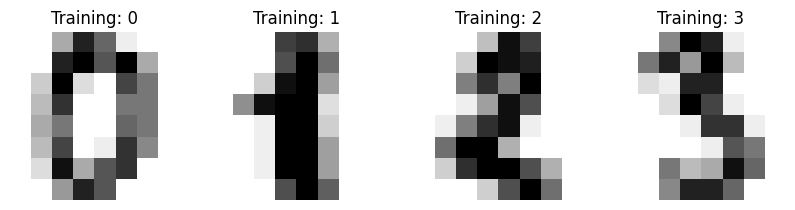

In [4]:
_, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation = 'nearest')
    ax.set_title('Training: %i' % label)

# Data preprocessing
##### Flatten Image

In [5]:
df.images.shape

(1797, 8, 8)

In [6]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
df.images[0].shape

(8, 8)

In [8]:
len(df.images)

1797

In [9]:
n_samples = len(df.images)
data = df.images.reshape(n_samples, -1)

In [10]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
data[0].shape

(64,)

In [12]:
data.shape

(1797, 64)

# Scaling Image Data

In [13]:
data.min()

0.0

In [14]:
data.max()

16.0

In [15]:
data = data/16

In [16]:
data.min()

0.0

In [17]:
data.max()

1.0

In [18]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Train Test Split Data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(data, df.target, test_size = 0.3)

In [21]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1257, 64), (540, 64), (1257,), (540,))

# Random Forest model

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf = RandomForestClassifier()

In [24]:
rf.fit(xtrain, ytrain)

RandomForestClassifier()

# Predict Test Data

In [25]:
y_pred = rf.predict(xtest)

In [26]:
y_pred

array([8, 4, 0, 4, 2, 4, 8, 8, 2, 5, 1, 0, 5, 7, 4, 0, 9, 5, 2, 2, 8, 5,
       7, 6, 3, 2, 1, 4, 7, 1, 3, 5, 1, 7, 3, 0, 1, 0, 5, 3, 6, 6, 2, 1,
       1, 3, 1, 9, 5, 7, 7, 1, 8, 6, 9, 0, 5, 5, 5, 4, 9, 4, 2, 0, 4, 3,
       1, 4, 1, 4, 1, 6, 2, 1, 3, 5, 0, 5, 8, 5, 6, 8, 0, 5, 2, 9, 3, 8,
       6, 9, 0, 5, 9, 4, 2, 4, 9, 4, 8, 2, 4, 5, 8, 3, 3, 9, 3, 8, 7, 5,
       3, 9, 7, 4, 9, 4, 0, 1, 8, 1, 7, 6, 5, 4, 7, 3, 5, 2, 2, 4, 4, 5,
       7, 2, 9, 0, 5, 3, 3, 4, 4, 1, 4, 9, 8, 0, 3, 2, 0, 5, 7, 1, 3, 2,
       0, 1, 1, 2, 8, 6, 4, 4, 5, 4, 1, 0, 6, 4, 1, 9, 5, 0, 9, 1, 7, 6,
       9, 3, 1, 8, 0, 0, 9, 3, 5, 6, 8, 6, 9, 1, 0, 1, 6, 3, 9, 6, 0, 9,
       2, 0, 4, 7, 1, 2, 0, 6, 3, 7, 1, 7, 6, 4, 7, 5, 6, 7, 2, 0, 5, 0,
       3, 2, 4, 0, 8, 0, 8, 6, 8, 6, 7, 3, 4, 8, 0, 6, 9, 3, 7, 2, 2, 4,
       5, 5, 4, 8, 3, 2, 1, 0, 8, 1, 4, 6, 6, 7, 4, 3, 1, 7, 2, 3, 1, 2,
       2, 5, 1, 8, 0, 2, 3, 4, 1, 9, 2, 0, 5, 2, 6, 6, 6, 1, 0, 6, 5, 9,
       5, 9, 1, 5, 1, 7, 1, 6, 2, 6, 9, 6, 2, 7, 3,

# Model Accuracy

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
confusion_matrix(ytest, y_pred)

array([[57,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 62,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0, 48,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 55,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  1, 47,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 54]])

In [29]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.95      0.98      0.97        63
           2       1.00      1.00      1.00        53
           3       1.00      0.95      0.97        56
           4       0.96      1.00      0.98        48
           5       0.96      1.00      0.98        55
           6       0.98      0.98      0.98        52
           7       0.98      0.98      0.98        48
           8       0.96      0.94      0.95        50
           9       0.96      0.96      0.96        56

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

